In [2]:
import nengo
from nengo.utils.matplotlib import rasterplot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nengo_learn_assoc_mem.learning_rules.fake_voja import FakeVoja

In [3]:
def cycle_array(x, period, dt=0.001):
    """Cycles through the elements"""
    i_every = int(round(period / dt))
    if i_every != period / dt:
        raise ValueError("dt (%s) does not divide period (%s)" % (dt, period))

    def f(t):
        i = int(round((t - dt) / dt))  # t starts at dt
        return x[int(i / i_every) % len(x)]

    return f

In [21]:
dims = 2
n_neurons = 20
seed = 2
intercepts = [0.8]*n_neurons

rad_comp = 1/np.sqrt(2)

In [22]:
with nengo.Network() as model:
    ens = nengo.Ensemble(n_neurons, dims, intercepts=intercepts, seed=seed)

with nengo.Simulator(model) as sim:
    pass

enc = sim.data[ens].encoders

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [29]:
with nengo.Network() as model:
    in_nd = nengo.Node(cycle_array([[-rad_comp, -rad_comp], [rad_comp, rad_comp]], 0.1))
    voja_learn_enable = nengo.Node(1)

    fake_voja = FakeVoja(enc.copy(), learning_rate=1e-3)
    ens = nengo.Ensemble(n_neurons, dims, intercepts=intercepts, seed=seed)

    nengo.Connection(in_nd, fake_voja.input_signal, synapse=None)
    nengo.Connection(ens.neurons, fake_voja.input_activities, synapse=0)
    nengo.Connection(voja_learn_enable, fake_voja.enable, synapse=None)
    nengo.Connection(fake_voja.output, ens.neurons, synapse=None)

    p_in = nengo.Probe(in_nd)
    p_spikes = nengo.Probe(ens.neurons)

with nengo.Simulator(model) as sim:
    sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

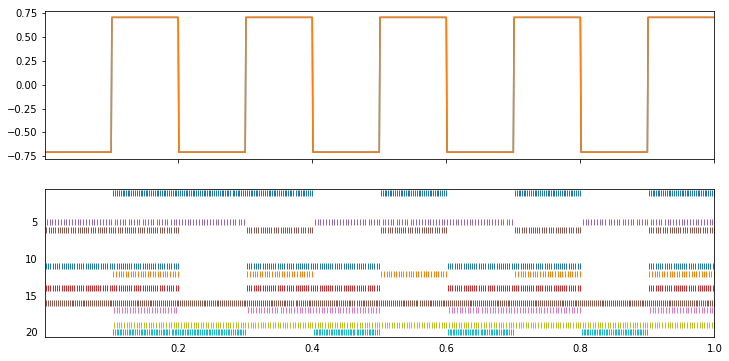

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
ax1.plot(sim.trange(), sim.data[p_in])
rasterplot(sim.trange(), sim.data[p_spikes], ax=ax2)

In [31]:
x_val = np.linspace(0, 2*np.pi, 50)
circ = np.array([np.cos(x_val), np.sin(x_val)]).T

enc_h = fake_voja.encoder_hist

In [32]:
len(enc_h)

10

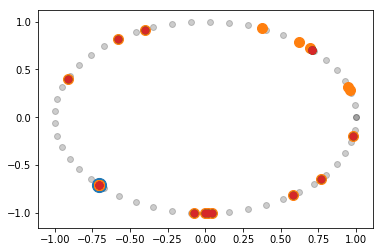

In [33]:
win_pre = 1
win_a = 2

plt.scatter(circ[:, 0], circ[:, 1], color='k', alpha=0.2)
plt.scatter(sim.data[p_in][win_pre][0], sim.data[p_in][win_pre][1], label="stim", s=200)

plt.scatter(enc_h[0][:, 0], enc_h[0][:, 1], label="orig", s=100)
plt.scatter(enc_h[win_pre][:, 0], enc_h[win_pre][:, 1], label="pre", s=50)
plt.scatter(enc_h[win_a][:, 0], enc_h[win_a][:, 1], label="a", s=50)

#plt.legend()
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)

In [ ]:
rad = 2
orig = np.array([0.1, -0.5])
mag = np.linalg.norm(orig)
mod = rad / mag * orig

x_val = np.linspace(0, 2*np.pi, 50)
base_circ = np.array([rad*np.cos(x_val), rad*np.sin(x_val)]).T

plt.scatter(orig[0], orig[1])
plt.scatter(mod[0], mod[1])
plt.scatter(base_circ[:, 0], base_circ[:, 1], color='k', alpha=0.2)